# IML Assignment 1

## Name:
Nurislam Zinnatullin

## Mail:
n.zinnatullin@innopolis.university

## Group:
AI-01

### Code style policy 

We expect you to follow https://peps.python.org/pep-0008/ Python standard style and will reduce your points if you don't. Also, we ask you to comment your code when it's needed (logical blocks, function declaration, loops), however over-documentation is the evil.

Example of nice code style (no need to run these cells):

In [73]:
# This function returns the sum of parameters
# @param my_param1 - here I explain what this parameter means
# @param my_param2 - here I explain what this parameter means
# @return - result of func if it's not void
def my_func(my_param1: int, my_param2: int):
    return my_param1 + my_param2

There are few lines only, but they are represents important logical blocks, thus you should explain what their purpose:

In [74]:
from my_training_package import my_regression, my_loader

# Data loading
x, y = my_loader.load("some.csv")

# Training
reg = my_regression()
reg.train(x,y)

# Evaluation on the same data set
y_pred = reg.evaluation(y)

ModuleNotFoundError: No module named 'my_training_package'

Example of too detailed and meaningless commenting that is not welcome:

In [75]:
# Import numpy package
import numpy as np
# This is variable x
x = 5
# This is variable y
y = 10
# Print x
print(x)

5


Ultimately, we believe in your programming common sense :) The purpose of clear code style is fast and smooth grading of your implementation and checking that you understand ML concepts.

## Task 1

### 3.1. Linear Regression
#### Data reading

In [76]:
import pandas as pd

# Data loading and exploration
df = pd.read_csv('train_1.csv')
df.head(10)

,Unnamed: 0,X_1,X_2,X_3,X_4,y
0,0,-1.924727,0.267947,0.596127,-1.150032,-5.195673
1,1,0.545333,-0.745503,2.773248,-0.975761,-20.118000
2,2,-1.833045,0.142620,-1.061453,-1.019242,0.630503
3,3,-1.297052,-0.857997,2.815755,-1.334396,-31.195297
4,4,-0.864305,-2.116955,6.347915,1.140341,-272.137746
5,5,1.795687,1.973620,-5.113603,-1.471940,127.632033
6,6,0.830451,2.417875,-7.219955,-1.808982,363.770821
7,7,0.205811,-0.370026,0.615315,-1.550593,-5.382155
8,8,-2.354931,1.026102,-2.882725,1.706066,20.446527
9,9,1.168741,-0.392934,0.858668,-1.509019,-3.181579


#### Train\validation splitting

In [77]:
from sklearn.model_selection import train_test_split

# Splitting data on target and feature sets
cols = [0, 5]
X = df.drop(df.columns[cols], axis=1)
y = df.iloc[:, 5]

# Splitting data on train and validation parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

#### Linear regression model fitting

In [78]:
from sklearn.linear_model import LinearRegression

# Declare and train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Prediction using model on the validation set
y_pred_lr = linear_model.predict(X_test)

#### Linear regression model prediction & Evaluation


In [79]:
from sklearn import metrics

# Print MSE, RMSE, MAE and R2 score
def print_metrics(y_actual, y_predicted):
    print('Mean squared error:', metrics.mean_squared_error(y_actual, y_predicted))
    print('Root mean squared error:', metrics.mean_squared_error(y_actual, y_predicted)**(1/2))
    print('Mean absolute error:', metrics.mean_absolute_error(y_actual, y_predicted))
    print('R squared score:', metrics.r2_score(y_actual, y_predicted))


print_metrics(y_test, y_pred_lr)

Mean squared error: 5987.7588824875165
Root mean squared error: 77.38061050733263
Mean absolute error: 65.44769186105418
R squared score: 0.8405037750217653


### 3. 2 Polynomial Regression
#### Constructing the polynomial regression pipeline

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [81]:
# Constructing polynomial regression pipeline
pipeline = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=2)),
    ('linear_regression', LinearRegression())
])

#### Tuning the degree hyper-parameter using GridSearch

In [82]:
import numpy as np
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomial_features__degree': np.arange(2, 6)}

# Declare a GridSearch instance 
search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=8,
    scoring='neg_mean_squared_error'
)

# Train the GridSearch
search.fit(X_train, y_train)

# Find the optimum degrees
print(f"Best parameter: {search.best_params_}")

# Print the GridSearchCV score
print(f"search score: {search.best_score_}")

Best parameter: {'polynomial_features__degree': 4}
search score: -0.8354607170469643


In [83]:
# Creating polynomial regression with best params and fitting it
best_degree = search.best_params_['polynomial_features__degree']
pipeline = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=best_degree)),
    ('linear_regression', LinearRegression())
]).fit(X_train, y_train)

# Predicting using model on validation set and Evaluating its performance
y_pred_pr = pipeline.predict(X_test)
print_metrics(y_test, y_pred_pr)

Mean squared error: 0.678774503731152
Root mean squared error: 0.8238777237740756
Mean absolute error: 0.5650871636672957
R squared score: 0.9999819194504853


#### Save the model

In [84]:
import pickle 

# Save the GridSearch model for evaluation
filename = 'poly_optimized_model.sav'
pickle.dump(search, open(filename, 'wb'))

### 3.3 Determine the linear dependent features

Use the following code cell to determine a pair of features from the training dataset that are correlated to each other. Explain your choice in the markdown cell.

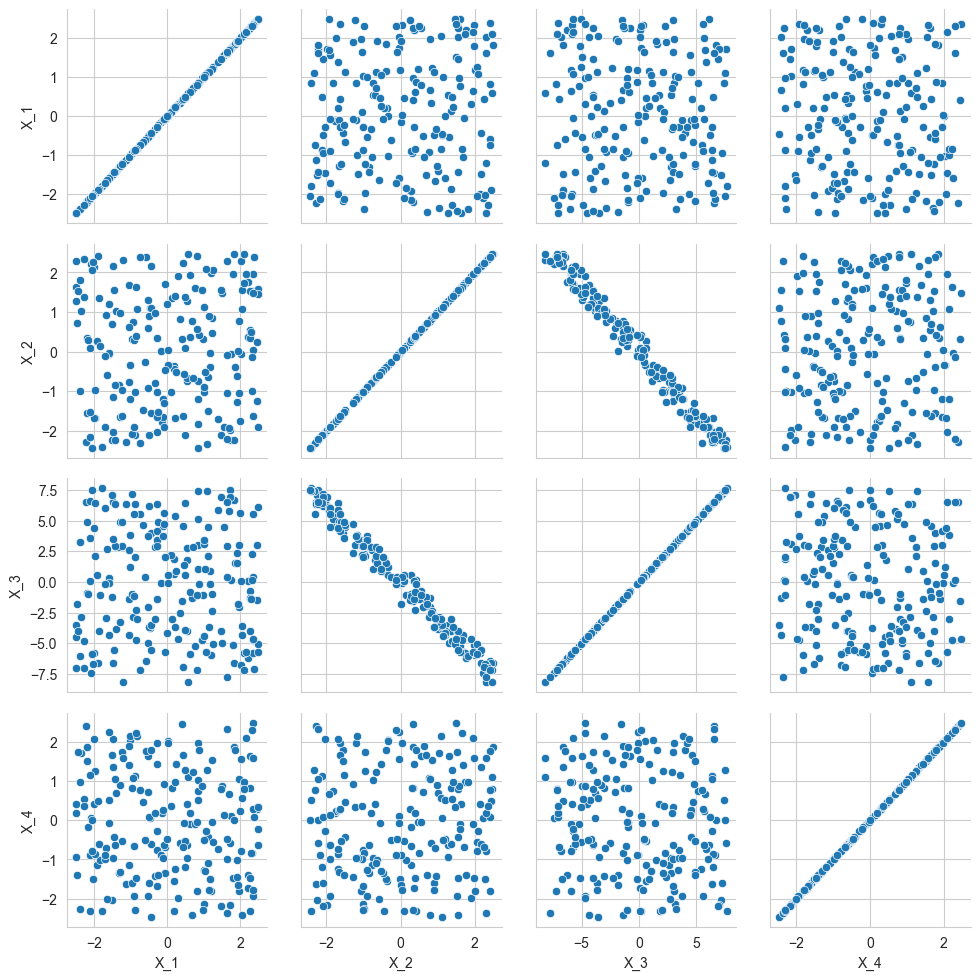

In [85]:
import seaborn as sns

# Plotting graphs of distribution of points in each pair of features
grid = sns.PairGrid(X)
grid.map(sns.scatterplot)

I have found a pair of features that are dependent: second and third features. They have negative correlation. Means that increasing in one feature (X_2) leads to decreasing in second one (X_3). We also simply can see that their correlation is linear. All this leads to the existence of a dependency between them. Other features are chaotically distributed between them

## Task 2

### Data processing
#### Loading the dataset

In [86]:
import pandas as pd

# Reading dataset
df = pd.read_csv('pokemon_modified.csv')

#### Exploring the dataset  and removing 2 redundant features

In [87]:
# Exploring the data
print(df.head(10))
print()
print(df.info())
print()

# After exploration there was only 3 candidate features to be removed: 'classification', 'name', 'type1', because they are the only features that represented as strings
# I want to make my data more generalizable and to reduce uniqueness like 'name' (because for each pokemon they are unique) and 'classification' (because 'type1' set is more concrete than 'classification'. 'type1' can be classified as species and 'classification' as families of pokemons as in biology)
# Also I need to convert either 'type1' or 'classification' via One-Hot encoder which will lead to increasing of features and dimensionality of my data, which will make my problem complex. It can bring our feature models to easily overfit.
# Therefore, I decided to delete 'classification' column because it's more unique compared to 'type1'

# Removing two columns: name and classification
df = df.drop(['name', 'classification'], axis=1)
print(df.head(10))


   against_bug  against_dark  against_dragon  against_electric  against_fairy  \
0         1.00           1.0             1.0               0.5            0.5   
1         1.00           1.0             1.0               0.5            0.5   
2         1.00           1.0             1.0               0.5            0.5   
3         0.50           1.0             1.0               1.0            0.5   
4         0.50           1.0             1.0               1.0            0.5   
5         0.25           1.0             1.0               2.0            0.5   
6         1.00           1.0             1.0               2.0            1.0   
7         1.00           1.0             1.0               2.0            1.0   
8         1.00           1.0             1.0               2.0            1.0   
9         1.00           1.0             1.0               1.0            1.0   

   against_fight  against_fire  against_flying  against_ghost  against_grass  \
0            0.5           2

#### Splitting the data
Use random_state = 123, stratify, and set test_size = 0.2

In [88]:
from sklearn.model_selection import train_test_split

# Splitting data on features and target sets
X = df.drop(['is_legendary'], axis=1)
y = df['is_legendary']

# Splitting data on training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.2, stratify=y)

Check if the dataset is balanced or not and comment on it

In [89]:
# Computing the ratio of number legendary pokemons in total number of pokemons in both train and test sets
num_legendary_in_train = sum(1 for i in y_train if i == 1)
num_legendary_in_test = sum(1 for i in y_test if i == 1)

print("Ratio of legendary pokemons in train data:", num_legendary_in_train/len(y_train))
print("Ratio of legendary pokemons in test data:", num_legendary_in_test/len(y_test))

Ratio of legendary pokemons in train data: 0.0875
Ratio of legendary pokemons in test data: 0.08695652173913043


Since these ratios are almost the same (0.0875 in train and 0.0869 in test), we can say that our data is balanced in terms of classes. $Ratio = \frac{number\_legendary}{total\_number}$

#### Checking for missing values

In [90]:
# Counting missing values in each column
missing_values_train = X_train.isnull().sum()
missing_values_test = X_test.isnull().sum()

# Finding indexes of columns that have missing values
missing_columns_train = [i for i in range(len(missing_values_train)) if missing_values_train.iloc[i] != 0]
missing_columns_test = [i for i in range(len(missing_values_test)) if missing_values_test.iloc[i] != 0]

print("Missing columns in train data", missing_columns_train)
print()
print("Missing columns in test data", missing_columns_test)
print()
print("Missing values in train data", missing_values_train)
print()
print("Missing values in test data", missing_values_test)

Missing columns in train data [25, 27, 32]

Missing columns in test data [25, 27, 32]

Missing values in train data against_bug           0
against_dark          0
against_dragon        0
against_electric      0
against_fairy         0
against_fight         0
against_fire          0
against_flying        0
against_ghost         0
against_grass         0
against_ground        0
against_ice           0
against_normal        0
against_poison        0
against_psychic       0
against_rock          0
against_steel         0
against_water         0
attack                0
base_egg_steps        0
base_happiness        0
base_total            0
capture_rate          0
defense               0
experience_growth     0
height_m             16
hp                    0
percentage_male      83
type1                 0
sp_attack             0
sp_defense            0
speed                 0
weight_kg            16
generation            0
dtype: int64

Missing values in test data against_bug           0
ag

#### Impute the missing values

In [91]:
from sklearn.impute import SimpleImputer

# Define a SimpleImputer instance using 'mean' strategy
imputer = SimpleImputer(strategy='most_frequent')

# Train it on each data set and replace cell with new imputed values
X_train_types = X_train.dtypes
X_test_types = X_test.dtypes

X_train = pd.DataFrame(
    imputer.fit_transform(X_train),
    columns=X_train.columns
).astype(X_train_types)

X_test = pd.DataFrame(
    imputer.fit_transform(X_test),
    columns=X_test.columns
).astype(X_test_types)


#### Double check that there are no missing values

In [92]:
# Counting missing values in each column
missing_values_train = X_train.isnull().sum()
missing_values_test = X_test.isnull().sum()

# Finding indexes of columns that have missing values
missing_columns_train = [i for i in range(len(missing_values_train)) if missing_values_train.iloc[i] != 0]
missing_columns_test = [i for i in range(len(missing_values_test)) if missing_values_test.iloc[i] != 0]

print("Missing columns in train data", missing_columns_train)
print()
print("Missing columns in test data", missing_columns_test)
print()
print("Missing values in train data", missing_values_train)
print()
print("Missing values in test data", missing_values_test)

# Now there is no columns with missing values

Missing columns in train data []

Missing columns in test data []

Missing values in train data against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
defense              0
experience_growth    0
height_m             0
hp                   0
percentage_male      0
type1                0
sp_attack            0
sp_defense           0
speed                0
weight_kg            0
generation           0
dtype: int64

Missing values in test data against_bug          0
against_dark         0
against_dragon       0
against_ele

#### Encode categorically

In [93]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

# As I said before, we need to encode either 'classification' or 'type1' feature. To reduce dimensionality of our problem, I decided to choose 'type1' column.
# Because 'type1' set is more concrete than 'classification'. 'type1' can be classified as species and 'classification' as families of pokemons as in biology

# Fit and transform the 'type1' column
train_encoded_values = encoder.fit_transform(X_train[['type1']])
test_encoded_values = encoder.fit_transform(X_test[['type1']])

# Create a new DataFrame with the one-hot encoded columns saving the same indexes and names
train_column_encoded = pd.DataFrame(train_encoded_values, columns=encoder.get_feature_names_out(['type1']), index=X_train[['type1']].index)
test_column_encoded = pd.DataFrame(test_encoded_values, columns=encoder.get_feature_names_out(['type1']), index=X_test[['type1']].index)

# Join our one-hot encoded columns to our dataset and remove old 'type1' column
X_train = pd.concat([X_train.drop('type1', axis=1), train_column_encoded], axis=1)
X_test = pd.concat([X_test.drop('type1', axis=1), test_column_encoded], axis=1)

X_test


,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,type1_ghost,type1_grass,type1_ground,type1_ice,type1_normal,type1_poison,type1_psychic,type1_rock,type1_steel,type1_water
0,2.0,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,2.0,1.0,0.5,1.0,0.0,2.0,2.0,2.0,0.50,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,1.0,1.0,1.0,0.5,2.0,2.0,1.0,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.5,1.0,2.0,0.5,1.0,0.5,0.5,1.0,1.0,0.25,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
157,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
158,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
159,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Scale the data

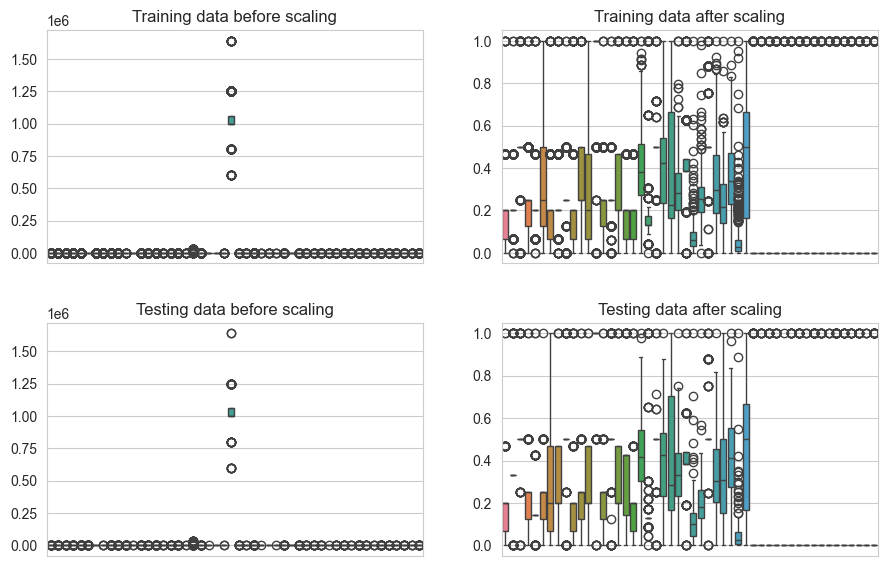

In [94]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns 

# Define a scaler instance from one of the above
scaler = MinMaxScaler()

# Apply the scaler on both train and test features
x_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(X_test)

# Plotting data before and after scaling
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 6))

sns.boxplot(data=X_train, ax=axes[0, 0])
axes[0, 0].set_title('Training data before scaling')

sns.boxplot(data=x_train, ax=axes[0, 1])
axes[0, 1].set_title('Training data after scaling')

sns.boxplot(data=X_test, ax=axes[1, 0])
axes[1, 0].set_title('Testing data before scaling')

sns.boxplot(data=x_test, ax=axes[1, 1])
axes[1, 1].set_title('Testing data after scaling')

plt.tight_layout()

for ax in axes.flatten():
    ax.set_xticks([])

plt.show()


#### <span style="color:red">Correlation matrix</span>

Are there highly co-related features in the dataset? Is it a problem? Explain in the markdown cell.

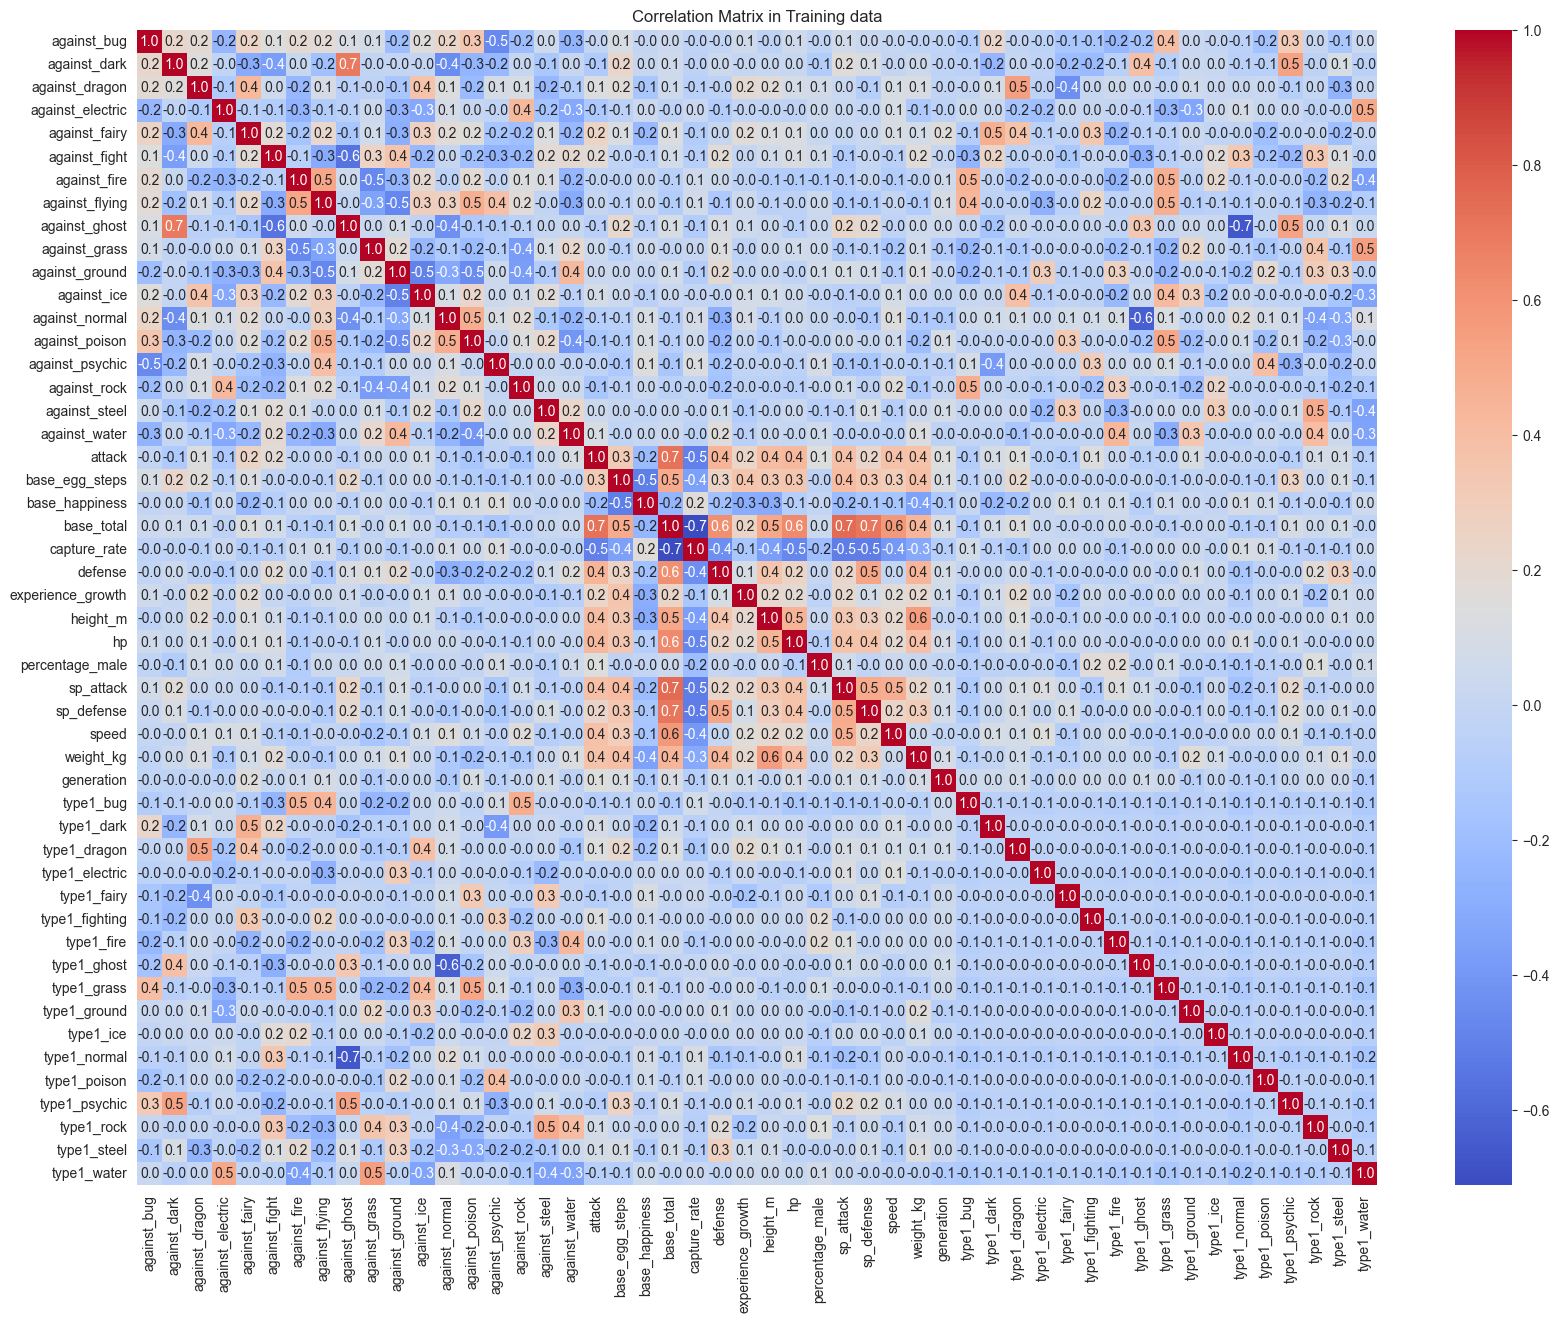

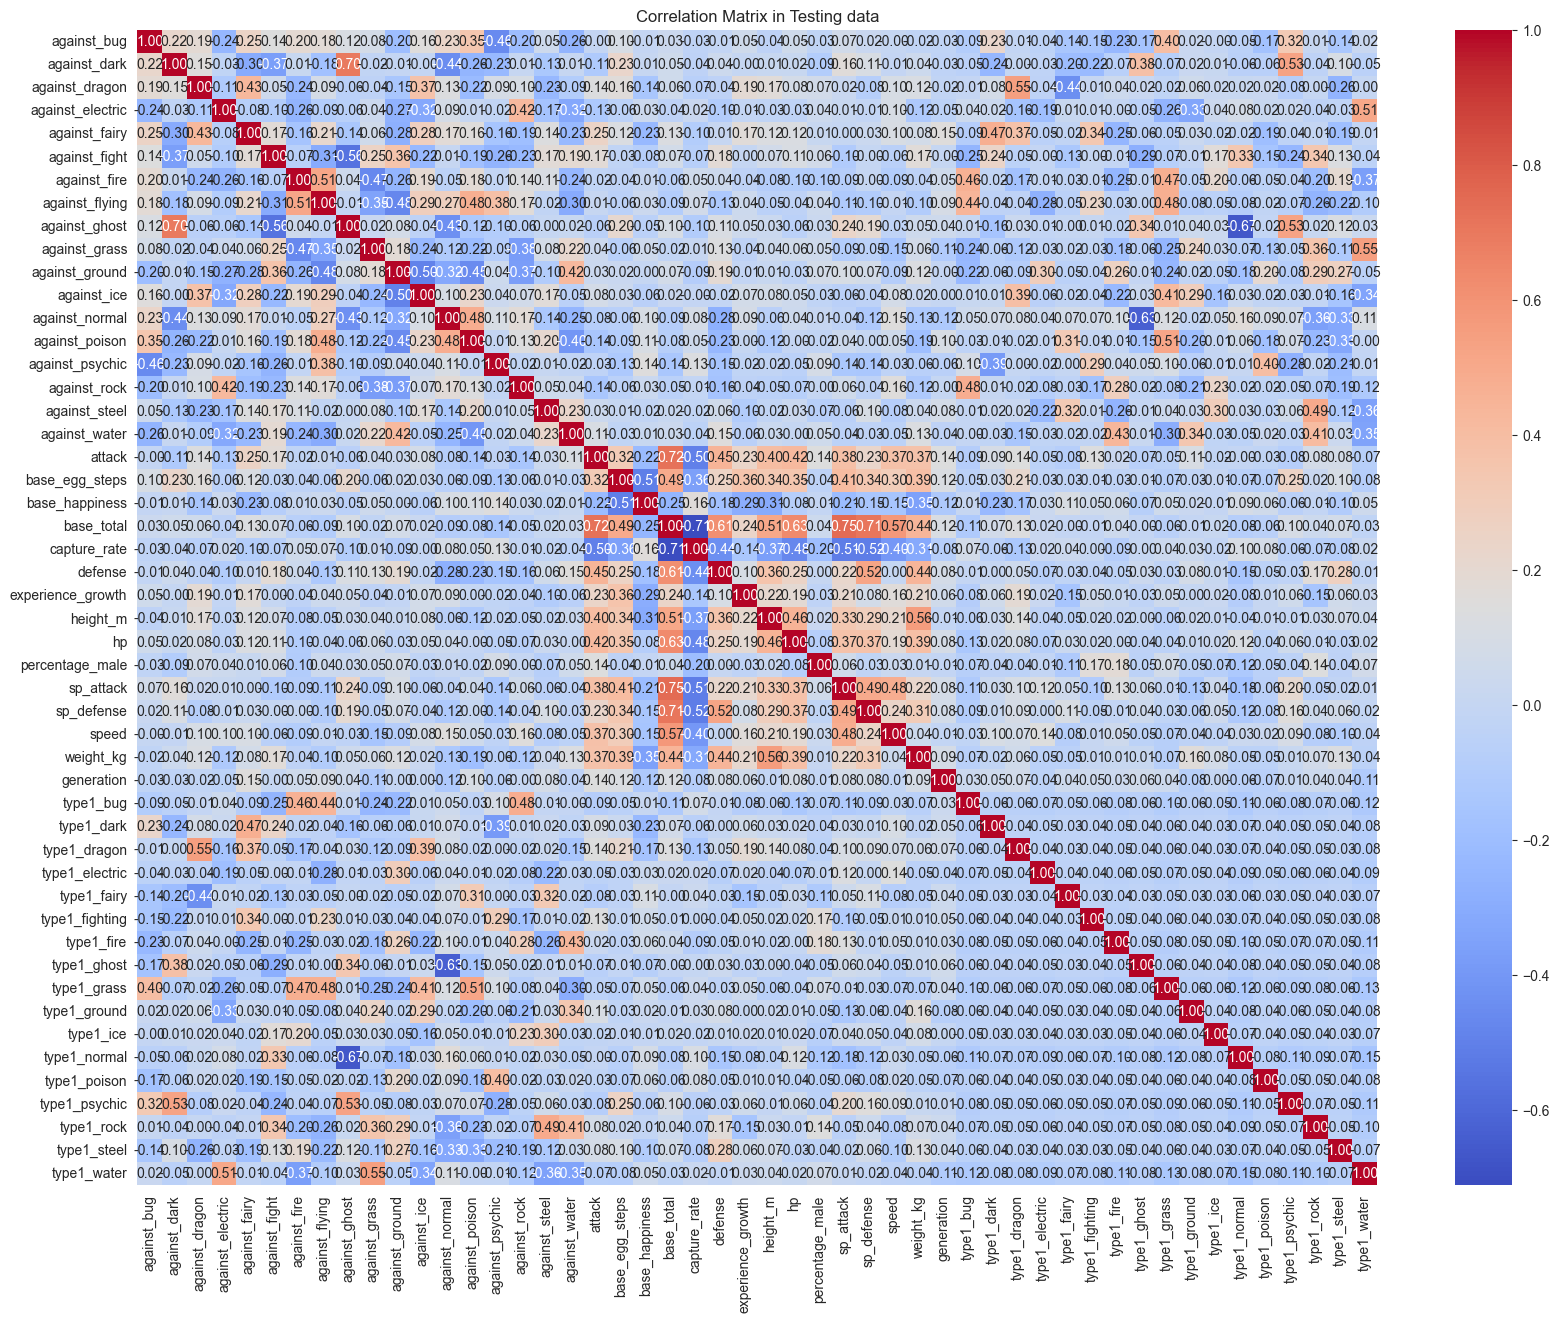

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Computing data for correlation matrix
training_correlation_matrix = X_train.corr()
testing_correlation_matrix = X_train.corr()

# Plot the correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(training_correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Matrix in Training data')

plt.figure(figsize=(20, 15))
sns.heatmap(training_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix in Testing data')

plt.show()

There are some features that are highly correlated: base_total & sp_defence; base_total & sp_attack; base_total & capture_rate; base_total & attack; against_ghost & against_dark. They have correlation more than 0.7. This correlation comes from an essence of the features. Base_total describes total rating of pokemon depending on its characteristics. Therefore, it's highly correlated with them. Ghost are dark creatures, so features are almost the same. 
It's not a big problem, because this correlation is not high enough (maximum is 0.75, which is less than 0.8).

### Model fitting and Comparison

#### Tuning LR model

In [96]:
# Calculate and print classification metrics: accuracy, precision, recall, and F1 score 
def print_clf_metrics(y_actual, y_predicted):
    print('Accuracy:', metrics.accuracy_score(y_actual, y_predicted))
    print('Precision:', metrics.precision_score(y_actual, y_predicted))
    print('Recall:', metrics.recall_score(y_actual, y_predicted))
    print('F1:', metrics.f1_score(y_actual, y_predicted))


In [97]:
# Specify GridSearchCV as in instruction
parameters = [
    {
        'penalty': ['l2'],
        'C': np.logspace(-3, 3, 7),
        'solver': ['newton-cg', 'lbfgs', 'liblinear']
    }, {
        'penalty': ['l1'],
        'C': np.logspace(-3, 3, 7),
        'solver': ['liblinear']
    }
]

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# Declaring and training logistic regression inside GridSearchCV with the parameters above
lr_clf_gs = GridSearchCV(
    LogisticRegression(max_iter=1000),
    parameters, 
    scoring='f1',
    cv=5
).fit(x_train, y_train)


In [99]:
# Predicting using Logistic regression with the best parameters to evaluate accuracy
y_pred_lr_clf_gs = lr_clf_gs.best_estimator_.predict(x_test)

print("Tuned Hyperparameters :", lr_clf_gs.best_params_)
print("Accuracy :", metrics.accuracy_score(y_test, y_pred_lr_clf_gs))

Tuned Hyperparameters : {'C': 100.0, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.9937888198757764


#### Construct a LR with the best params and Evaluate the LR with the best params

In [100]:
# Constructing, fitting, and predicting Logistic regression with best parameters
lr_clf = LogisticRegression(
    C=lr_clf_gs.best_params_['C'],
    penalty=lr_clf_gs.best_params_['penalty'],
    solver=lr_clf_gs.best_params_['solver']
).fit(x_train, y_train)
lr_y_pred = lr_clf.predict(x_test)

In [101]:
print_clf_metrics(y_test, lr_y_pred)

Accuracy: 0.9937888198757764
Precision: 0.9333333333333333
Recall: 1.0
F1: 0.9655172413793104


#### Print the top 5 most influencing features and the top 5 ignored features

In [102]:
# Taking features' coefficients
coefficients = lr_clf.coef_[0]
features = X_train.columns

# Finding indexes of most influencing and ignored features
top_influence_indexes = np.argsort(np.abs(coefficients))[::-1][:5]
top_ignored_indexes = np.argsort(np.abs(coefficients))[:5]

# Taking those features
top_influence_features = [features[i] for i in top_influence_indexes]
top_ignored_features = [features[i] for i in top_ignored_indexes]

print("Top 5 most influencing features: ", top_influence_features)
print("Top 5 most ignored features: ", top_ignored_features)

Top 5 most influencing features:  ['base_egg_steps', 'capture_rate', 'type1_normal', 'experience_growth', 'base_total']
Top 5 most ignored features:  ['sp_attack', 'against_ghost', 'against_bug', 'type1_ground', 'type1_dark']


#### Tuning KNN model

In [103]:
from sklearn.neighbors import KNeighborsClassifier

# Initializing parameters for KNN Grid search
param_grid = {
    'n_neighbors': list(range(1, 15)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'cosine']
}

# Declare and train knn inside GridSearchCV
knn_clf_gs = GridSearchCV(
    KNeighborsClassifier(),
    param_grid
).fit(x_train, y_train)


print("Tuned Hyperparameters :", knn_clf_gs.best_params_)
print("Accuracy:", knn_clf_gs.best_score_)

Tuned Hyperparameters : {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
Accuracy: 0.946875


#### Construct a KNN model with the best params and Evaluate the KNN with the best params


In [104]:
# Declaring and fitting KNN with best parameters
knn_clf = KNeighborsClassifier(
    n_neighbors=knn_clf_gs.best_params_['n_neighbors'],
    weights=knn_clf_gs.best_params_['weights'],
    metric=knn_clf_gs.best_params_['metric']
).fit(x_train, y_train)

# Evaluating the KNN
knn_y_pred = knn_clf.predict(x_test)
print_clf_metrics(y_test, knn_y_pred)

Accuracy: 0.9751552795031055
Precision: 1.0
Recall: 0.7142857142857143
F1: 0.8333333333333334


#### Fitting GNB to the data and evaluating on the test dataset

In [105]:
from sklearn.naive_bayes import GaussianNB

# Declare and train GaussianNB. No hyperparameters tuning 
gauss_nb_clf = GaussianNB().fit(x_train, y_train)
gauss_y_pred = gauss_nb_clf.predict(x_test)

print_clf_metrics(y_test, gauss_y_pred)

Accuracy: 0.8695652173913043
Precision: 0.4
Recall: 1.0
F1: 0.5714285714285714


#### Which metric is most appropriate for this task and why?

In [106]:
print("Ration of number of legendary pokemons in whole dataset:", sum(1 for i in df['is_legendary'] if i == 1)/len(df['is_legendary']))

Ration of number of legendary pokemons in whole dataset: 0.08739076154806492


As we can see, number of legendary pokemons in the dataset is small compared to the non-legendary. Therefore, it's imbalanced dataset in terms of legendarity.
So accuracy become less significant.
Small precision is bad for us, because it can lead to the case when we will be very accurate, because we will call most pokemons as legendary.
The same issue with recall. It's also bad for us, if it will be small, because we will miss legendary pokemons.
So, we need a balance between precision and recall, which is F1-Score.
Therefore, the mose appropriate metric for this task is F1-Score.

The most critical error (false negative or false positive) for this dataset is precision (false positive).
It's better to find legendary pokemons, than to miss them, because they are rare.

#### Compare the 3 classifiers in terms of accuracy, precision, recall and F1-score.
What is the best model for this task? Explain

In [107]:
# Creating Table that will have all the metrics for each classifier
classifiers = [lr_clf, knn_clf, gauss_nb_clf]
classifier_names = ['Logistic regression', 'KNN', 'Gaussian Naive-Bayes']

classifier_metrics = pd.DataFrame(columns=classifier_names, index=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

for classifier, name in zip(classifiers, classifier_names):
    y_pred = classifier.predict(x_test)
    
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    
    classifier_metrics.loc['Accuracy', name] = accuracy
    classifier_metrics.loc['Precision', name] = precision
    classifier_metrics.loc['Recall', name] = recall
    classifier_metrics.loc['F1-Score', name] = f1

print(classifier_metrics)

          Logistic regression       KNN Gaussian Naive-Bayes
Accuracy             0.993789  0.975155             0.869565
Precision            0.933333       1.0                  0.4
Recall                    1.0  0.714286                  1.0
F1-Score             0.965517  0.833333             0.571429


Logistic regression is best model for this task. It has the best score in accuracy and F1-Score. Meaningfully, it founds the best tradeoff between precision and recall. 
KNN is ideal in precision, but bad at recall. So it misses many legendary pokemons. 
Gaussian NB is opposite to KNN. It recognises all the legendary, but incorrectly classifies some non-legendary pokemon as legendary.

## 5. Bonus Task

#### Loading the Dataset

In [108]:
import pandas as pd

# Loading Datasets
train_data = pd.read_csv('bonus_train.csv')
test_data = pd.read_csv('bonus_test.csv')

In [109]:
# Splitting the data
X_train, X_test, y_train, y_test = train_data.iloc[:, :3], test_data.iloc[:, :3], train_data.iloc[:, 3], test_data.iloc[:, 3]

####  Plot the data using the pairplot in sns

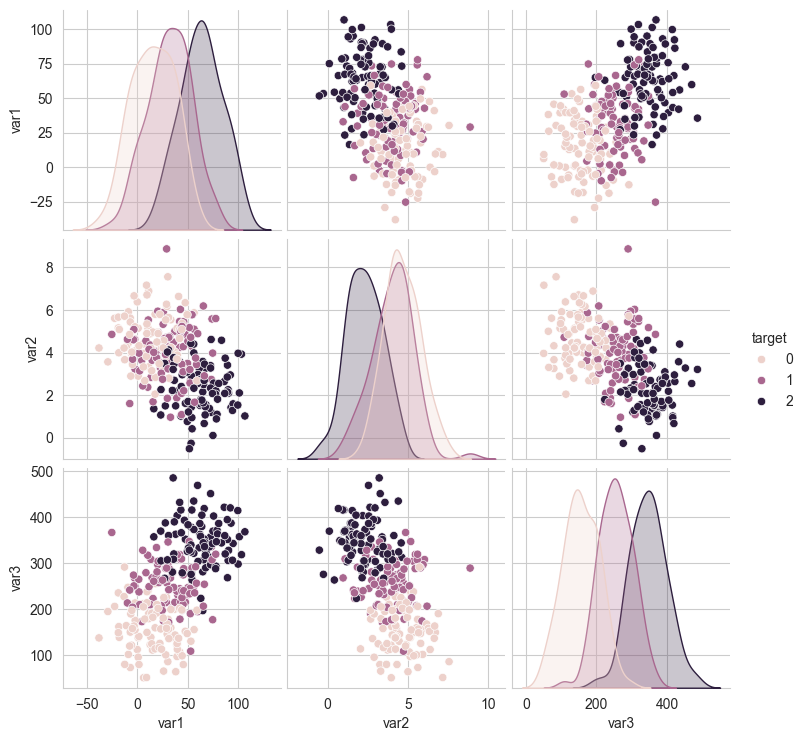

In [110]:
import seaborn as sns

# Plotting the data
sns.pairplot(train_data, kind='scatter', hue='target')

#### Fit LR to the training dataset using OVR and evaluate on the test dataset

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Creating and fitting Logistic regression using OVR technique
ovr_lr = LogisticRegression(multi_class='ovr').fit(X_train, y_train)

# Evaluating its accuracy
y_pred_ovr_lr = ovr_lr.predict(X_test)
print("One vs rest Logistic regression accuracy:", accuracy_score(y_test, y_pred_ovr_lr))

One vs rest Logistic regression accuracy: 0.8


#### Fit LR to the training dataset using multinomial and evaluate on the test dataset


In [112]:
# Creating and fitting Logistic regression using Multinomial technique
multi_lr = LogisticRegression(multi_class='multinomial', max_iter=1000).fit(X_train, y_train)

# Evaluating its accuracy
y_pred_multi_lr = multi_lr.predict(X_test)
print("Multinomial Logistic regression accuracy:", accuracy_score(y_test, y_pred_multi_lr))

Multinomial Logistic regression accuracy: 0.9


#### Using gridsearch to tune the C value and multi class

In [113]:
# Initializing parameters for Multinomial logistic regression in Grid search
params = {
    'C': np.logspace(-10, 10,7),
    'multi_class': ['multinomial', 'ovr']
}

# Declaring and fitting Multinomial logistic regression to find the best parameters using Grid Search
grid_search_clf = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid=params,
    scoring='accuracy',
    cv=5
).fit(X_train, y_train)

In [114]:
print("Tuned Hyperparameters :", grid_search_clf.best_params_)
print("Accuracy :", grid_search_clf.best_score_)

Tuned Hyperparameters : {'C': 2154.4346900318865, 'multi_class': 'multinomial'}
Accuracy : 0.825925925925926


#### Comment on why one multi_class technique was better than the other

Multinomial logistic regression is better. One vs Rest is worse compared to MLR, when there is dependency in features (they are correlated), because we cannot easily separate those classes. As we can see above there is dependency on 3 and 1; 3 and 2 features. Therefore, MLR is better.

#### Create LR with the best params

In [115]:
# Creating Logistic regression with best parameters
multi_lr = LogisticRegression(
    C=grid_search_clf.best_params_['C'],
    multi_class=grid_search_clf.best_params_['multi_class']
)

#### Visualize the decision boundaries

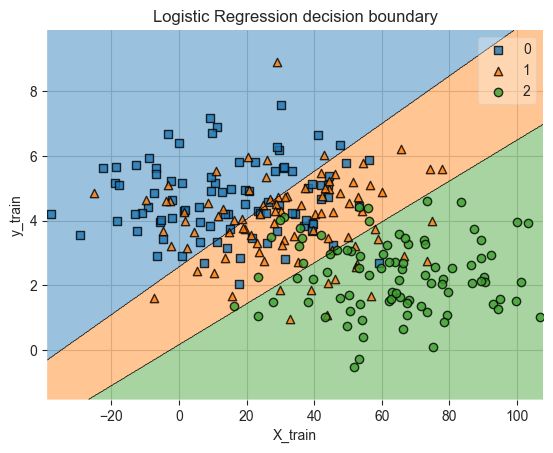

In [116]:
from mlxtend.plotting import plot_decision_regions

# Taking only two features to plot on 2D
X_train = X_train.iloc[:, :2]

# Fitting on two features
multi_lr.fit(X_train.values, y_train.values)

# Visualizing the decision boundaries
plot_decision_regions(X_train.to_numpy(), y_train.to_numpy(), clf=multi_lr)

plt.xlabel('X_train')
plt.ylabel('y_train')
plt.title('Logistic Regression decision boundary')
plt.show()

#### Comment on the decision boundary, do you think this is a good model or not? and based on what?

As we can see, model successfully separated the data. It's good model, because the majority of targets on their area. However, there is a disadvantage: it divides linearly, which is not the most efficient way. 